In [18]:
import glob
import json
import numpy as np
import cv2
import pdb
from matplotlib import pyplot as plt
import os

data_path = 'out'
out_img_path = 'tmp/'

% matplotlib inline

In [19]:
flist = [x.split('/')[-1] for x in  glob.glob(data_path + '/*')]
cates = set([x.split('_')[0] for x in flist])

In [33]:
cates

{'bend',
 'jack',
 'jump',
 'pjump',
 'run',
 'side',
 'skip',
 'walk',
 'wave1',
 'wave2'}

In [34]:
data={}
for cate in cates:
    data[cate] = glob.glob(data_path + '/' + cate + '*.json' )

In [35]:
data.keys()

['pjump',
 'run',
 'skip',
 'walk',
 'jump',
 'wave1',
 'wave2',
 'side',
 'jack',
 'bend']

In [44]:
trainX = []
trainY = []
for idx, k in enumerate(data.keys()):
    print 'label: %d, category: %s' % (idx,k)
    # for each class
    for it in data[k]:
        print it
        xt = [x['p'] for x in json.load(open(it, 'r'))]
        break
    break

label: 0, category: pjump
out/pjump_shahar_pjump.json


In [45]:
xt[0] - np.asarray(xt[0][0])

array([[  0,   0],
       [  2,  29],
       [-15,  38],
       [-18,  64],
       [-14,  86],
       [ 19,  36],
       [ 30,  61],
       [ 26,  82],
       [ -1,  96],
       [ -1, 132],
       [  4, 164],
       [ 17,  95],
       [ 19, 131],
       [ 19, 166]])

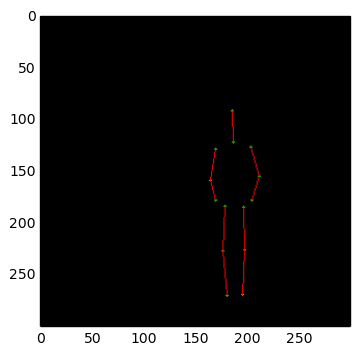

In [46]:
for i,x in enumerate(xt):
    pose2Img2(x,i)

In [42]:
def pose2Img2(framePose, it):
    pairRef = [1, 2, 3, 4, 4, 5, 6, 7, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14]
    pairRef = np.reshape(pairRef,(-1,2)) - 1
    im = np.zeros((300,300,3), np.uint8)
    for cord in framePose:

        cv2.circle(im, tuple(cord), 1, (0, 255, 0), 1)
    for lineMark in pairRef:
        # print tuple(framePose[lineMark[0]][:-1])
        cv2.line(im, tuple(framePose[lineMark[0]]),  tuple(framePose[lineMark[1]]), (0, 0, 255), 1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    out_path = os.path.join(out_img_path, str(it).zfill(4) + '.jpg')
    cv2.imwrite(out_path, im)

In [31]:
heads = [x['p'][0] for x in xt]

In [32]:
heads

[[180, 76],
 [169, 59],
 [159, 50],
 [157, 64],
 [165, 57],
 [162, 58],
 [162, 60],
 [163, 62],
 [162, 60],
 [164, 98],
 [162, 68],
 [179, 92],
 [171, 103],
 [192, 103],
 [177, 117],
 [170, 113],
 [165, 116],
 [164, 110],
 [157, 108],
 [156, 108]]

In [27]:
np.mean(xt[0]['p'],axis=0)

array([ 201.14285714,  188.28571429])

In [19]:
for x in xt:
    

array([180,  76, 170, 122, 164, 146, 179, 198, 220, 206, 168, 136, 187,
       179, 221, 193, 186, 216, 259, 220, 241, 267, 183, 207, 245, 208,
       213, 262])